<a href="https://www.kaggle.com/code/muhammadumairab/internet-users-in-permanent-5-p5-countries?scriptVersionId=127437513" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The **P5** refers to the UN Security Council's five permanent members; namely China, France, Russia, the United Kingdom, and the United States.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
#Loading the "Internet users ..." dataset
data = pd.read_csv("/kaggle/input/worldwide-internet-users/Internet Users percent of population.csv")
data.shape

(266, 34)

In [3]:
data.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.768383,NaN,...,74.000000,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,0.0,0.001599,0.004664,0.013609,0.029658,0.081216,0.106349,0.202056,...,8.575522,10.189313,12.304789,14.625664,15.894355,18.240060,21.700695,24.304658,27.350308,NaN
2,Afghanistan,AFG,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,5.454545,5.900000,7.000000,8.260000,11.000000,13.500000,16.800000,17.600000,18.400000,NaN
3,Africa Western and Central,AFW,0.0,0.000000,0.000000,0.000000,0.000004,0.000129,0.007035,0.019842,...,10.293447,12.577170,14.934062,18.192287,20.926632,24.663587,29.338368,31.785861,34.128137,NaN
4,Angola,AGO,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000776,0.005674,...,7.700000,13.000000,21.400000,22.000000,23.200000,26.000000,29.000000,32.400000,36.000000,NaN


In [4]:
#Lets look for missing values
print("Total NaN values in data =",np.sum(np.sum(data.isnull())))

Total NaN values in data = 965


In [5]:
#Let's fill the missing values in the dataset
data.fillna(value=0,inplace=True)

In [6]:
#Let's verify the results
print("Total NaN values in data =",np.sum(np.sum(data.isnull())))

Total NaN values in data = 0


In [7]:
#Exrtracting the data of US
us=data[data["Country Name"]=="United States"].copy()
us

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
251,United States,USA,0.784729,1.163194,1.724203,2.271673,4.862781,9.237088,16.419353,21.616401,...,74.7,71.4,73.0,74.554202,85.544421,87.274889,88.498903,89.430285,90.9,0.0


In [8]:
#Add the data of rest of the P5 Countries
P5 = us.copy()
for country in ["China","France","United Kingdom","Russian Federation"]:
    P5=pd.concat([P5,data[data["Country Name"]==country].copy()])
P5

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
251,United States,USA,0.784729,1.163194,1.724203,2.271673,4.862781,9.237088,16.419353,21.616401,...,74.700000,71.4000,73.00,74.554202,85.544421,87.274889,88.498903,89.430285,90.900000,0.0
40,China,CHN,0.000000,0.000000,0.000000,0.000169,0.001168,0.004955,0.013082,0.032395,...,42.300117,45.8000,47.90,50.300000,53.200000,54.300000,59.200000,64.109838,70.404775,0.0
77,France,FRA,0.052778,0.140114,0.279049,0.590619,0.899867,1.637947,2.584034,4.255004,...,81.440000,81.9198,83.75,78.006038,79.269811,80.502460,82.043187,83.339744,84.800000,0.0
81,United Kingdom,GBR,0.087355,0.174231,0.260615,0.519762,1.036609,1.895168,4.123650,7.385399,...,87.479998,89.8441,91.61,92.000300,94.775801,90.424550,90.692009,92.516629,94.818201,0.0
202,Russian Federation,RUS,0.000000,0.000000,0.000673,0.013447,0.053817,0.148151,0.269753,0.472964,...,66.000000,67.9700,70.52,70.099241,73.091435,76.008139,80.864722,82.642162,84.994670,0.0


In [9]:
#Set the coutry name as the index
P5.set_index(keys="Country Name",drop=True,inplace=True)
P5

,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,USA,0.784729,1.163194,1.724203,2.271673,4.862781,9.237088,16.419353,21.616401,30.093197,...,74.700000,71.4000,73.00,74.554202,85.544421,87.274889,88.498903,89.430285,90.900000,0.0
China,CHN,0.000000,0.000000,0.000000,0.000169,0.001168,0.004955,0.013082,0.032395,0.168540,...,42.300117,45.8000,47.90,50.300000,53.200000,54.300000,59.200000,64.109838,70.404775,0.0
France,FRA,0.052778,0.140114,0.279049,0.590619,0.899867,1.637947,2.584034,4.255004,6.319779,...,81.440000,81.9198,83.75,78.006038,79.269811,80.502460,82.043187,83.339744,84.800000,0.0
United Kingdom,GBR,0.087355,0.174231,0.260615,0.519762,1.036609,1.895168,4.123650,7.385399,13.669983,...,87.479998,89.8441,91.61,92.000300,94.775801,90.424550,90.692009,92.516629,94.818201,0.0
Russian Federation,RUS,0.000000,0.000000,0.000673,0.013447,0.053817,0.148151,0.269753,0.472964,0.812744,...,66.000000,67.9700,70.52,70.099241,73.091435,76.008139,80.864722,82.642162,84.994670,0.0


In [10]:
#Remove the unnecessay columns
P5.drop(["Country Code","2021"],axis=1,inplace=True)
P5

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,0.784729,1.163194,1.724203,2.271673,4.862781,9.237088,16.419353,21.616401,30.093197,35.848724,...,69.729461,74.700000,71.4000,73.00,74.554202,85.544421,87.274889,88.498903,89.430285,90.900000
China,0.000000,0.000000,0.000000,0.000169,0.001168,0.004955,0.013082,0.032395,0.168540,0.708188,...,38.300000,42.300117,45.8000,47.90,50.300000,53.200000,54.300000,59.200000,64.109838,70.404775
France,0.052778,0.140114,0.279049,0.590619,0.899867,1.637947,2.584034,4.255004,6.319779,9.125318,...,77.819999,81.440000,81.9198,83.75,78.006038,79.269811,80.502460,82.043187,83.339744,84.800000
United Kingdom,0.087355,0.174231,0.260615,0.519762,1.036609,1.895168,4.123650,7.385399,13.669983,21.293638,...,85.379999,87.479998,89.8441,91.61,92.000300,94.775801,90.424550,90.692009,92.516629,94.818201
Russian Federation,0.000000,0.000000,0.000673,0.013447,0.053817,0.148151,0.269753,0.472964,0.812744,1.018985,...,58.000000,66.000000,67.9700,70.52,70.099241,73.091435,76.008139,80.864722,82.642162,84.994670


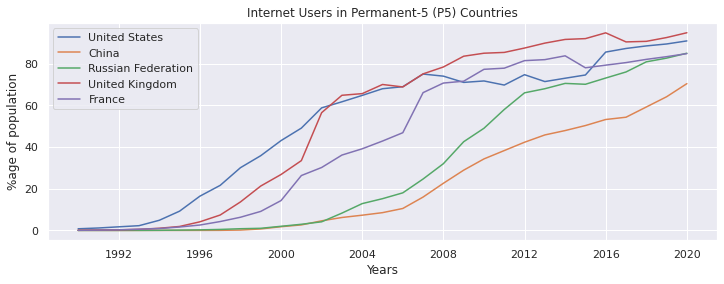

In [11]:
#Plot the data
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(pd.to_datetime(P5.columns),P5.loc["United States"],label="United States")
ax.plot(pd.to_datetime(P5.columns),P5.loc["China"],label="China")
ax.plot(pd.to_datetime(P5.columns),P5.loc["Russian Federation"],label="Russian Federation")
ax.plot(pd.to_datetime(P5.columns),P5.loc["United Kingdom"],label="United Kingdom")
ax.plot(pd.to_datetime(P5.columns),P5.loc["France"],label="France")
ax.set(xlabel="Years",ylabel="%age of population",
       title="Internet Users in Permanent-5 (P5) Countries")
ax.legend()

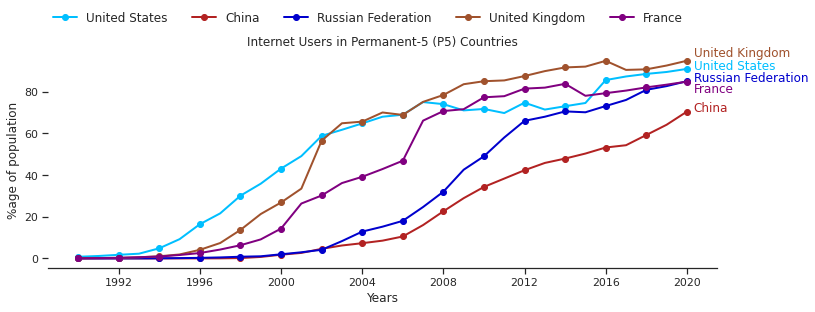

In [12]:
#Let's beautify the plot
sns.set_style("ticks")
fig,ax = plt.subplots(figsize=(12,4))

ax.plot(pd.to_datetime(P5.columns),P5.loc["United States"],
        c="deepskyblue",label="United States",marker="o",markevery=2,linewidth=2)
ax.text(pd.to_datetime("2020-05-05"),P5.loc["United States","2020"],s="United States",
        c="deepskyblue")

ax.plot(pd.to_datetime(P5.columns),P5.loc["China"],
        c="firebrick",label="China",marker="o",markevery=2,linewidth=2)
ax.text(pd.to_datetime("2020-05-05"),P5.loc["China","2020"],s="China",c="firebrick")

ax.plot(pd.to_datetime(P5.columns),P5.loc["Russian Federation"],
        c="mediumblue",label="Russian Federation",marker="o",markevery=2,linewidth=2)
ax.text(pd.to_datetime("2020-05-05"),P5.loc["Russian Federation","2020"],
        s="Russian Federation", c="mediumblue")

ax.plot(pd.to_datetime(P5.columns),P5.loc["United Kingdom"],
        c="sienna",label="United Kingdom",marker="o",markevery=2,linewidth=2)
ax.text(pd.to_datetime("2020-05-05"),P5.loc["United Kingdom","2020"]+2,
        s="United Kingdom", c="sienna")

ax.plot(pd.to_datetime(P5.columns),P5.loc["France"],
        c="purple",label="France",marker="o",markevery=2,linewidth=2)
ax.text(pd.to_datetime("2020-05-05"),P5.loc["France","2020"]-5,
        s="France", c="purple")

sns.despine(left=True)

ax.set(xlabel="Years",ylabel="%age of population",
       title="Internet Users in Permanent-5 (P5) Countries")
ax.legend(loc=(0,1.1),ncol=5,frameon=False,fontsize="medium")
plt.savefig("P5.png",bbox_inches='tight')
#bbox_inches parameter is used to avoid clipping of picture while saving it

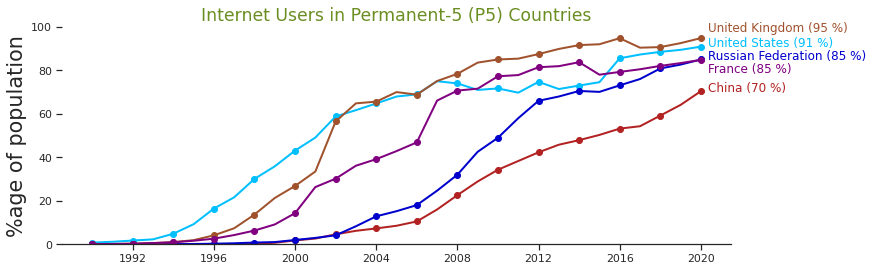

In [13]:
#Let's use the for loop for ease
sns.set_style("ticks")
fig,ax = plt.subplots(figsize=(12,4))
for country,color in zip(["United States","China","Russian Federation",
                      "United Kingdom","France"],
               ["deepskyblue","firebrick","mediumblue","sienna","purple"]):
    if country == "France":
        off_set = -6
    elif country == "United Kingdom":
        off_set = 3
    else:
        off_set = 0
    ax.plot(pd.to_datetime(P5.columns),P5.loc[country],
        c=color,marker="o",markevery=2,linewidth=2)
    ax.text(pd.to_datetime("2020-05-05"),P5.loc[country,"2020"]+off_set,
            s="{0} ({1} %)".format(country,round(P5.loc[country,"2020"])),
        c=color)
sns.despine(left=True)
plt.title("Internet Users in Permanent-5 (P5) Countries",size="x-large",
         c="olivedrab")
plt.ylabel("%age of population",size="xx-large")
plt.ylim([0,100]);